**Fadlan Akmal Ramadhan - Kangae**

#Deskripsi Tugas



Student Activity
Lakukan proses di atas menggunakan dataset review product https://drive.google.com/file/d/1qn5WXp-H95_FL_Rx5oqvfZaflYdHsnrF/view?usp=sharing

Tugas Anda:
- Tentukan langkah pre-processing yang tepat untuk dataset di atas.
- Gunakan range `n_gram` yang berbeda. Amati apa perbedaannya.
- Menurut Anda, apakah `term` yang dihasilkan (`X_kbest_features`) pada feature selection sudah memiliki informasi yang relevan?

Setelah dikerjakan, buatlah resume berdasarkan pengalaman Anda dalam melakukan pre-processing dan feature engineering.

Kumpulkan tugas Anda pada: https://s.id/tugas-nlp-ofa



#Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import io

# Untuk mempermudah, simpan setiap objek agar dapat digunakan untuk pemodelan maupun deployment. Gunakan library Pickle
import pickle

%matplotlib inline

In [ ]:
!pip -q install sastrawi

     |████████████████████████████████| 209 kB 5.4 MB/s 


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#Data Acquisition

In [ ]:
url = 'https://drive.google.com/file/d/1qn5WXp-H95_FL_Rx5oqvfZaflYdHsnrF/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.head(10)

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,09 Apr 2019,androidApp,2019-10-02
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24 Sep 2017,androidApp,2019-10-02
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,04 Apr 2018,androidApp,2019-10-02
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22 Sep 2017,androidApp,2019-10-02
4,100002528,beli-harddisk-eksternal,Yosep M.,5,NaN,NaN,NaN,0,0,0,True,16.01,17 Agu 2018,androidApp,2019-10-02
5,100002528,beli-harddisk-eksternal,Deden,5,NaN,NaN,NaN,0,0,0,True,16.01,02 Nov 2017,androidApp,2019-10-02
6,100002528,beli-harddisk-eksternal,Yeana,5,NaN,NaN,NaN,0,0,0,True,13.01,25 Sep 2017,mobile,2019-10-02
7,100002528,beli-harddisk-eksternal,nurfarida,1,NaN,ada pengirimn ntb bima,bima,4,4,0,True,7.22,NaN,androidApp,2019-10-02
8,100003785,beli-harddisk-eksternal,Fadjar B.,1,NaN,NaN,baru 10 bulan layarnya dah bergaris,0,0,0,True,21.49,06 Apr 2017,androidApp,2019-10-02
9,100003785,beli-harddisk-eksternal,agung p.,5,NaN,Barang bagus sesuai specs,"Pesan rabu sore,minggu sore sampe,,barang sesu...",0,0,0,True,19.50,01 Mar 2017,mobile,2019-10-02


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203787 entries, 0 to 203786
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   itemId          203787 non-null  int64  
 1   category        203787 non-null  object 
 2   name            203787 non-null  object 
 3   rating          203787 non-null  int64  
 4   originalRating  8 non-null       float64
 5   reviewTitle     23404 non-null   object 
 6   reviewContent   107029 non-null  object 
 7   likeCount       203787 non-null  int64  
 8   upVotes         203787 non-null  int64  
 9   downVotes       203787 non-null  int64  
 10  helpful         203787 non-null  bool   
 11  relevanceScore  203787 non-null  float64
 12  boughtDate      196680 non-null  object 
 13  clientType      203787 non-null  object 
 14  retrievedDate   203787 non-null  object 
dtypes: bool(1), float64(2), int64(5), object(7)
memory usage: 22.0+ MB


In [ ]:
# Mengambil sample sebanyak 10% dari data raw untuk mempercepat proses 
dataSample = df.sample(frac=0.10)
dataSample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20379 entries, 187009 to 49660
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   itemId          20379 non-null  int64  
 1   category        20379 non-null  object 
 2   name            20379 non-null  object 
 3   rating          20379 non-null  int64  
 4   originalRating  1 non-null      float64
 5   reviewTitle     2310 non-null   object 
 6   reviewContent   10742 non-null  object 
 7   likeCount       20379 non-null  int64  
 8   upVotes         20379 non-null  int64  
 9   downVotes       20379 non-null  int64  
 10  helpful         20379 non-null  bool   
 11  relevanceScore  20379 non-null  float64
 12  boughtDate      19688 non-null  object 
 13  clientType      20379 non-null  object 
 14  retrievedDate   20379 non-null  object 
dtypes: bool(1), float64(2), int64(5), object(7)
memory usage: 2.4+ MB


In [ ]:
# Drop Column yang tidak dibutuhkan
dataSample = dataSample.drop(columns=['itemId', 'category', 'name','originalRating','reviewTitle','likeCount','upVotes','downVotes','boughtDate','helpful','relevanceScore','clientType','retrievedDate'])
dataSample.head(10)

,rating,reviewContent
187009,3,Pesen malem besoknya dianterin... Tp sayang sa...
99923,3,"Barang diterima dgn baik, barangnya baik kond..."
40406,5,NaN
90436,5,NaN
154072,5,NaN
109930,5,NaN
83176,5,NaN
107546,5,NaN
50575,5,"produknya bagus, sesuai dengan harganya tapi k..."
66110,5,"barang dah sampe tanpa cacat,tapi blm di coba"


In [ ]:
dataSample = dataSample.dropna()
dataSample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10742 entries, 187009 to 49660
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rating         10742 non-null  int64 
 1   reviewContent  10742 non-null  object
dtypes: int64(1), object(1)
memory usage: 251.8+ KB


In [ ]:
dataSample.head(10)

,rating,reviewContent
187009,3,Pesen malem besoknya dianterin... Tp sayang sa...
99923,3,"Barang diterima dgn baik, barangnya baik kond..."
40406,5,NaN
90436,5,NaN
154072,5,NaN
109930,5,NaN
83176,5,NaN
107546,5,NaN
50575,5,"produknya bagus, sesuai dengan harganya tapi k..."
66110,5,"barang dah sampe tanpa cacat,tapi blm di coba"


#Text Preprocessing

##Case Folding

In [ ]:
import re

# Buat fungsi untuk langkah case folding
def casefolding(text):
  text = text.lower()                               # Mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
  text = re.sub(r'[^\w\s]','', text)                # Menghapus karakter tanda baca
  text = text.strip()
  return text

In [ ]:
raw_sample = dataSample['reviewContent'].iloc[2]
case_folding = casefolding(raw_sample)

print('Raw data\t: ', raw_sample)
print('Case folding\t: ', case_folding)

Raw data	:  produknya bagus, sesuai dengan harganya tapi kenapa tidak bisa support dengan HDD external 500gb atau 1Tb ya. apa ada caranya agar support dengan HDD external ?
Case folding	:  produknya bagus sesuai dengan harganya tapi kenapa tidak bisa support dengan hdd external gb atau tb ya apa ada caranya agar support dengan hdd external


##Word Normalization

In [ ]:
# Download corpus singkatan
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv

--2022-03-30 15:47:48--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80969 (79K) [text/plain]
Saving to: ‘key_norm.csv’

key_norm.csv        100%[===================>]  79.07K  --.-KB/s    in 0.01s   

2022-03-30 15:47:48 (5.95 MB/s) - ‘key_norm.csv’ saved [80969/80969]



In [ ]:
key_norm = pd.read_csv('key_norm.csv')

def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

##Filtering - StopWord Removal

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [ ]:
# Buat fungsi untuk langkah stopword removal

more_stopword = ['tsel', 'gb', 'rb']                    # Tambahkan kata dalam daftar stopword
stopwords_ind = stopwords_ind + more_stopword

def remove_stop_words(text):
  clean_words = []
  text = text.split()
  for word in text:
      if word not in stopwords_ind:
          clean_words.append(word)
  return " ".join(clean_words)

In [ ]:
raw_sample = dataSample['reviewContent'].iloc[0]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)

Raw data		:  Pesen malem besoknya dianterin... Tp sayang saya masih disini SO nya.
Case folding		:  pesen malem besoknya dianterin tp sayang saya masih disini so nya
Stopword removal	:  pesen malem besoknya dianterin tp sayang so nya


##Stemming

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

In [ ]:
raw_sample = dataSample['reviewContent'].iloc[0]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)
print('Stemming\t\t: ', text_stemming)

Raw data		:  Pesen malem besoknya dianterin... Tp sayang saya masih disini SO nya.
Case folding		:  pesen malem besoknya dianterin tp sayang saya masih disini so nya
Stopword removal	:  pesen malem besoknya dianterin tp sayang so nya
Stemming		:  sen malem besok dianterin tp sayang so nya


##Text Preprocessing Pipeline

In [ ]:
# Buat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing_process(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = remove_stop_words(text)
  text = stemming(text)
  return text

In [ ]:
%%time
dataSample['clean_review'] = dataSample['reviewContent'].apply(text_preprocessing_process)

In [ ]:
# Simpan data yang telah melalui text preprocessing agar kita tidak perlu menjalankan proses tersebut mulai awal (Opsional)
dataSample.to_csv('clean_data.csv')

In [ ]:
dataSample

,rating,reviewContent
187009,3,Pesen malem besoknya dianterin... Tp sayang sa...
99923,3,"Barang diterima dgn baik, barangnya baik kond..."
50575,5,"produknya bagus, sesuai dengan harganya tapi k..."
66110,5,"barang dah sampe tanpa cacat,tapi blm di coba"
113670,5,Terima Kasih... Estimasi waktu pengiriman leb...
...,...,...
104046,5,Barang sesuai deakripsi. Memuaskan pokokny. Th...
97273,5,mantap dapet barang yang berfungsi semuanya
201305,5,barangny dah nyampe alhamdulilah pesen hr rabu...
99866,5,Barang bagus sesuai harga. Wifi Connection cep...


#Feature Engineering

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = 'drive/My Drive/Orbit/'
dataClean = pd.read_csv(path+'/clean_data.csv')
dataClean.head()

,Unnamed: 0,rating,reviewContent,clean_review
0,1237,2,Barang nya kira kira bagus g y semoga pas data...,barang nya bagus y moga pas bagus
1,15030,5,Mantappp Flashsale 99 harga murah meriah 😁👍👍👍,mantappp flashsale harga murah riah
2,131591,5,"Barang bagus, pesan kemarin hari ini sudah sam...",barang bagus pesan kemarin terimakasih lazada ...
3,147400,5,murah namun berkualitas. sound juga ok. sayang...,murah kualitas sound ok sayang netflix pilih a...
4,47463,5,oke,oke


In [ ]:
dataClean.isnull().sum()

Unnamed: 0        0
rating            0
reviewContent     0
clean_review     48
dtype: int64

In [ ]:
#Mengambil 7000 data, karena ketidakmampuan memproses data
data = dataClean[:5000]

In [ ]:
data = dataClean.dropna()
data.isnull().sum()

Unnamed: 0       0
rating           0
reviewContent    0
clean_review     0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10687 entries, 0 to 10734
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     10687 non-null  int64 
 1   rating         10687 non-null  int64 
 2   reviewContent  10687 non-null  object
 3   clean_review   10687 non-null  object
dtypes: int64(2), object(2)
memory usage: 417.5+ KB


In [ ]:
# Pisahkan kolom feature dan target
X = data['clean_review']
y = data['rating']

In [ ]:
X

0                        barang nya bagus y moga pas bagus
1                      mantappp flashsale harga murah riah
2        barang bagus pesan kemarin terimakasih lazada ...
3        murah kualitas sound ok sayang netflix pilih a...
4                                                      oke
                               ...                        
10730    terimakasih lazada respinya cepat pesan tangga...
10731    televisi nya jernih connect wifi mantap biar b...
10732                                        gambat mantap
10733                             lumayan dapet flash sale
10734                       puas barang servis terimakasih
Name: clean_review, Length: 10687, dtype: object

In [ ]:
y

0        2
1        5
2        5
3        5
4        5
        ..
10730    5
10731    5
10732    4
10733    5
10734    5
Name: rating, Length: 10687, dtype: int64

##Feature Extraction - BoW dan N-Gram

In [ ]:
# Mengubah teks menjadi vektor menggunakan metode Bag of Words (BoW)
from sklearn.feature_extraction.text import CountVectorizer

# BoW - Unigram
vec = CountVectorizer(ngram_range=(1,1))
vec.fit(X)

CountVectorizer()

In [ ]:
# Melihat Jumlah Fitur pada Data
print(len(vec.get_feature_names_out()))

9343


In [ ]:
# Melihat fitur-fitur apa saja yang ada di dalam corpus
print(vec.get_feature_names_out())

['aaaaaaaasika' 'aaamiiiin' 'aaamiin' ... 'zonk' 'zoonk' 'zuma']


In [ ]:
# Melihat matriks jumlah token
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

X_unigram = vec.transform(X).toarray()

X_unigram

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
data_unigram = pd.DataFrame(X_unigram, columns=vec.get_feature_names_out())
data_unigram

,aaaaaaaasika,aaamiiiin,aaamiin,aaamin,aada,aamantank,aamiiin,aamiin,aamiinsukses,aampai,...,zen,zenfone,zero,zllu,zmoga,zo,zong,zonk,zoonk,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10683,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10684,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10685,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
with open('bow.pickle', 'wb') as output:
  pickle.dump(X_unigram, output)

##Feature Extraction - TF-IDF dan N-Gram

In [ ]:
# Menggunakan metode TF-IDF untuk mengubah teks menjadi vector

from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1,1))
tf_idf.fit(X)

X_tf_idf = tf_idf.transform(X)

In [ ]:
# Melihat Jumlah Fitur
print(len(tf_idf.get_feature_names_out()))

9343


In [ ]:
# Melihat matriks jumlah token menggunakan TF IDF, lihat perbedaannya dengan metode BoW
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

X_tf_idf = tf_idf.transform(X).toarray()

X_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
data_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,aaaaaaaasika,aaamiiiin,aaamiin,aaamin,aada,aamantank,aamiiin,aamiin,aamiinsukses,aampai,...,zen,zenfone,zero,zllu,zmoga,zo,zong,zonk,zoonk,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
with open('tf_idf.pickle', 'wb') as output:
  pickle.dump(X_tf_idf, output)

##Feature Selection

In [ ]:
# Mengubah nilai data tabular tf-idf menjadi array agar dapat dijalankan pada proses seleksi fitur
X = np.array(data_tf_idf)
y = np.array(y)

In [ ]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 

# Ten features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2, k=1500) 
X_kbest_features = chi2_features.fit_transform(X, y) 
  
# Reduced features 
print('Original feature number:', X.shape[1]) 
print('Reduced feature number:', X_kbest_features.shape[1]) 

Original feature number: 9343
Reduced feature number: 1500


In [ ]:
# chi2_features.scores_ adalah nilai chi-square, semakin tinggi nilainya maka semakin baik fiturnya
data_chi2 = pd.DataFrame(chi2_features.scores_, columns=['nilai'])
data_chi2

,nilai
0,0.162347
1,0.098025
2,0.237120
3,0.237120
4,0.207124
...,...
9338,0.082550
9339,10.229001
9340,1.568400
9341,0.153765


In [ ]:
# Menampilkan fitur beserta nilainya
feature = tf_idf.get_feature_names_out()
data_chi2['fitur'] = feature
data_chi2

,nilai,fitur
0,0.162347,aaaaaaaasika
1,0.098025,aaamiiiin
2,0.237120,aaamiin
3,0.237120,aaamin
4,0.207124,aada
...,...,...
9338,0.082550,zo
9339,10.229001,zong
9340,1.568400,zonk
9341,0.153765,zoonk


In [ ]:
# Mengurutkan fitur terbaik
data_chi2.sort_values(by='nilai', ascending=False)

,nilai,fitur
3998,174.804763,kecewa
2752,119.624596,file
7269,104.561452,rusak
3651,103.739677,jelek
4056,93.696634,kembali
...,...,...
5771,0.021399,noisepecahpecah
5825,0.021399,nuansa
3123,0.021399,greeting
2711,0.021399,familiar


In [ ]:
# Menampilkan mask pada feature yang diseleksi
# False berarti fitur tidak terpilih dan True berarti fitur terpilih
mask = chi2_features.get_support()
mask

array([False, False, False, ..., False, False, False])

In [ ]:
# Menampilkan fitur-fitur terpilih berdasarkan mask atau nilai tertinggi yang sudah dikalkulasi pada Chi-Square
new_feature = []
for bool, f in zip(mask, feature):
  if bool:
    new_feature.append(f)
  selected_feature = new_feature
len(selected_feature)

1500

In [ ]:
# Membuat vocabulary baru berdasarkan fitur yang terseleksi
#Ini digunakan untuk mengenerate fitur vector tf-idf pada proses deployment

new_selected_features = {}

for (k,v) in tf_idf.vocabulary_.items():
    if k in selected_feature:
        new_selected_features[k] = v

new_selected_features

{'barang': 817,
 'nya': 5840,
 'bagus': 530,
 'moga': 5448,
 'pas': 6309,
 'murah': 5547,
 'terimakasih': 8530,
 'lazada': 4575,
 'packing': 6206,
 'rapih': 6973,
 'puas': 6828,
 'kualitas': 4343,
 'ok': 5979,
 'sayang': 7491,
 'batas': 882,
 'oke': 5991,
 'sesuai': 7796,
 'cepat': 1571,
 'original': 6136,
 'kecewa': 3998,
 'bracket': 1305,
 'janji': 3610,
 'pokok': 6659,
 'flas': 2778,
 'mantap': 5013,
 'mantul': 5089,
 'selamat': 7605,
 'androidnya': 301,
 'kitkat': 4188,
 'awet': 453,
 'nice': 5725,
 'datengnya': 1986,
 'muas': 5491,
 'emang': 2598,
 'mbak': 5197,
 'gigabyte': 3018,
 'ya': 9246,
 'syukuuurin': 8332,
 'good': 3069,
 'mudah': 5496,
 'rapi': 6962,
 'halbonas': 3191,
 'bayar': 908,
 'tanggal': 8383,
 'braket': 1311,
 'over': 6179,
 'all': 197,
 'emas': 2599,
 'pakai': 6239,
 'cek': 1544,
 'alhamdulillah': 168,
 'aman': 221,
 'sih': 7875,
 'cancel': 1483,
 'ramah': 6924,
 'inc': 3459,
 'darat': 1947,
 'lambat': 4505,
 'kali': 3856,
 'susah': 8300,
 'bubble': 1383,
 'lapt

In [ ]:
#Save vectorizer.vocabulary_
#Menyimpan vektor dari vocabulary di atas dalam bentuk pickle (.pkl)
pickle.dump(new_selected_features,open("selected_feature_tf-idf.pkl","wb"))

In [ ]:
# Menampilkan fitur-fitur yang sudah diseleksi 
# Beserta nilai vektornya pada keseluruhan data untuk dijalankan pada proses machine learning

# Hanya k fitur yang terpilih sesuai parameter k yang ditentukan sebelumnya

data_selected_feature = pd.DataFrame(X_kbest_features, columns=selected_feature)
data_selected_feature

,abal,acdc,aduh,aduu,adzab,afa,agakkecewa,agian,agst,ajabsa,...,yak,yaotu,yapersyaratan,yasepertinya,yaw,ybs,yh,ys,zenfone,zong
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
selected_x = X_kbest_features
selected_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
with open('best_feature.pickle', 'wb') as output:
  pickle.dump(X_kbest_features, output)

#Word Cloud

In [ ]:
# Import Library WordCloud. WordCloud digunakan untuk melihat secara visual kata-kata yang paling sering muncul.
# Import Library cv2 untuk mengolah gambar menjadi masking WordCloud

import cv2
from wordcloud import WordCloud

In [ ]:
# Download gambar masking
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg

--2022-03-30 15:34:01--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34396 (34K) [image/jpeg]
Saving to: ‘cloud.jpg’

cloud.jpg           100%[===================>]  33.59K  --.-KB/s    in 0.001s  

2022-03-30 15:34:01 (54.7 MB/s) - ‘cloud.jpg’ saved [34396/34396]



In [ ]:
originalImage = cv2.imread('cloud.jpg')
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
(thresh, cloud_mask) = cv2.threshold(grayImage, 100, 255, cv2.THRESH_BINARY)

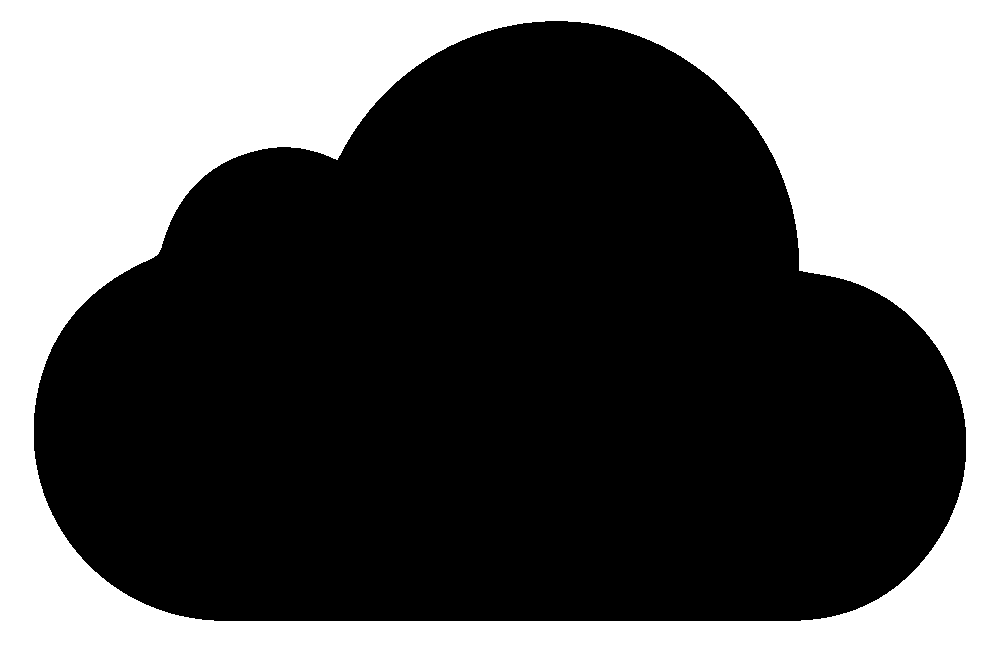

In [ ]:
# Tampilkan masking
from google.colab.patches import cv2_imshow

cv2_imshow(cloud_mask)

##WordCloud Rating = 1

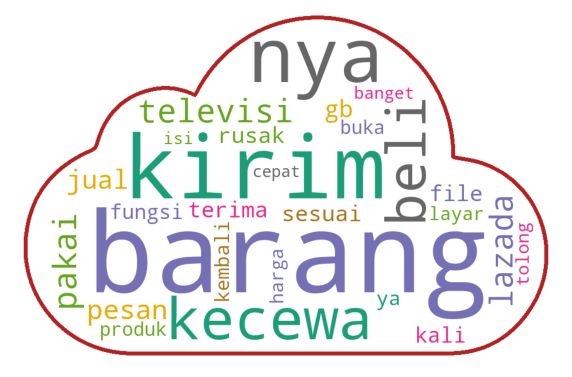

In [ ]:
review_normal = data[data.rating == 1]
normal_string = []

for t in review_normal.clean_review:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

##WordCloud Rating = 2

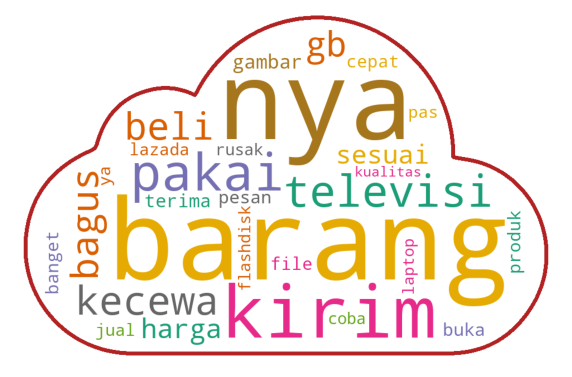

In [ ]:
review_normal = data[data.rating == 2]
normal_string = []

for t in review_normal.clean_review:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

##WordCloud Rating = 3

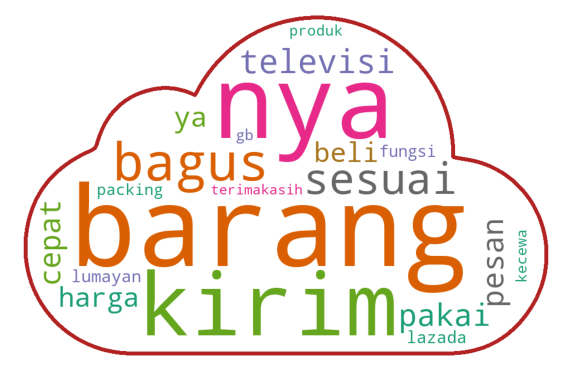

In [ ]:
review_normal = data[data.rating == 3]
normal_string = []

for t in review_normal.clean_review:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

##WordCloud Rating = 4

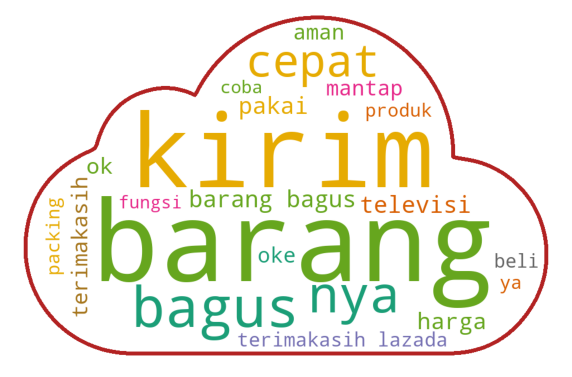

In [ ]:
# WordCloud Rating Review

review_normal = data[data.rating == 4]
normal_string = []

for t in review_normal.clean_review:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

##WordCloud Rating = 5

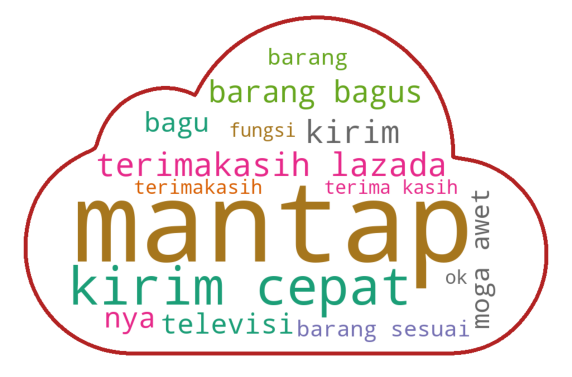

In [ ]:
# WordCloud Rating Review

review_normal = data[data.rating == 5]
normal_string = []

for t in review_normal.clean_review:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#Resume

Berdasarkan dari hasil percobaan yang telah dilakukan, dapat disimpulkan sebagai berikut:

**- Preprocessing**

Preprocessing merupakan suatu hal fundamental yang harus dilakukan dengan tepat. Pada kasus kali ini, dataset memiliki jumlah lebih dari 200K data entry. Karena keterbatasan dari berbagai hal penunjang percobaan (Computing, RAM, GPU, dll.) maka kita harus memilih jumlah data yang harus digunakan. Pada projek kali ini, kami mengambil sekitar 10% dari jumlah total data mentah (raw data) untuk diolah. Masalah berikutnya terjadi ketika banyak data yang memiliki nilai null/Nan, sehingga harus dilakukan pembersihan terlebih dahulu, agar data yang diolah mendapatkan hasil yang akurat. Setelah itu dilakukan text preprocessing berupa case folding, stopword removal, dan juga stemming.


**- Feature Engineering**

Pada bagian feature engineering, kami menjumpai beberapa hal yang kurang dapat dipahami. Pada bagian preprocessing sebelumnya, kami telah membersihkan data dari nilai null/NaN, agar data dapat diolah dengan baik. Namun, kami menjumpai masih terdapat data dengan nilai null/NaN pada tahap ini, sehingga harus dilakukan drop fitur yang memiliki nilai null/NaN. Selanjutnya kami mengolah data sebanyak 5000 data, karena keterbatasan resource dari komputer.


**- N-Gram**

Percobaan menggunakan N-Gram hanya dapat dilakukan dengan cara terbatas, sehingga kesimpulan yang didapat pun masih terbatas pula. Pada n-gram(1,1) hasil yang didapatkan sudah cukup sesuai, walaupun terdapat beberapa kata yang tidak diprediksi menggunakan nilai n-gram(1,1).

**-Term dari X_kbest_features**

Berdasarkan pengamatan secara singkat, hasil yang didapatkan cukup baik, dan menampilkan informasi yang berkaitan dengan data yang diolah.
